# Estructuras de control

Hasta ahora, el código que hemos escrito se ejecuta de forma secuencial y lineal, pero normalmente nos interesará introducir un **control del flujo** para crear estructuras que nos permiten introducir una lógica que haga nuestro código más útil. Para ello en esta sección y las siguientes, vamos a ver
- bloques de tipo if, elif, else
- bucles tipo for y while
- funciones
- clases

Antes de ello, es importante notar que **Python hace uso de la indentación para definir el alcance** de un fragmento de nuestro programa. Mientras que otros programas utilizan corchetes y delimitadores, en Python utilizamos indentación para definir bucles, funciones, clases etc.

> En Python, uno o más espacios en blanco son interpretados como una indentación. Lo que sí es fundamental es utilizar siempre el mismo número de espacios en blanco.

Por ejemplo

Buena indentación ✅
```
if True:
    x = 1  # 4 espacios
    y = 2  # 4 espacios
```
Mal ❌
```
def my_func(x):
    x = x + 1  
       y = 3   
    z = x + y  
    return z

# Debemos usar siempre el mismo número de espacios
if True:
    x = 3  
    y = 2  
else:
  x = 2  
  y = 1    
```

Dicho esto, vamos a empezar viendo las primeras estructuras de control, los bloques condicionales.

---
## Bloques condicionales

Los bloques condicionales nos permiten ejecutar partes de nuestro código en función de si ciertas condiciones se cumplen o no. Para definir estos bloques, hacemos uso de la palabra reservada `if` seguida de un booleano o una expresión cuyo resultado sea un booleano, aunque también se aceptan otros tipos. Si queremos añadir una parte que se ejecute si la condición no es cierta, añadimos un `else`. Por ejemplo, en la siguiente celdilla elevamos al cuadrado un número si es negativo o al cubo si es positivo

```
if x < 0:
    x = x**2
else:
    y = x**3
```

Para definir condiciones son útiles los operadores de comparación o pertenencia `<`, `<=`, `>`, `>=`, `==`, `!=`, `is`, `is not`, `in`, `not in`. Python nos permite anidar varias de estas operaciones como `x < y < z` (siempre se ejecutan las comprobaciones de izquierda a derecha).  

Al igual que los booleanos se pueden interpretar como valores numéricos, otros tipos en Python pueden valorar condiciones. Por ejemplo, cuando hacemos la conversión `int` -> `bool`, todo entero distinto de cero será interpretado como `True` y 0 a `False`. Más generalmente, se interpretan como `False`
- `None`
- Ceros de cualquier tipo numérico: `0`, `0.0`, `0j`.
- Secuencias vacías: `""`, `[]`, `tuple()`, `np.array([])`. En general, cualquier objeto con longitud 0.k
- Diccionarios y conjuntos vacios: `dict()`, `set()`

Los tipos numéricos no nulos y las secuencias/colecciones no vacías de evalúan como `True` vía `bool`.

In [ ]:
if not set():
    print("foo")

foo


Si por otro lado, queremos encadenar una serie de condiciones, podemos usar la estructura `elif`

```
if num_health > 80:
    status = "good"
elif num_health > 50:
    status = "okay"
elif num_health > 0:
    status = "danger"
else:
    status = "dead"
```

:::{exercise}
:label: control-flow-conditionals

Dada una lista `my_list` y el siguiente código

```
first_item = None

if my_list:
    first_item = my_list[0]
```
¿Cuánto vale `first_item` si `my_list` es vacía?

:::

### Declaraciones `if`-`else` en línea

Como ya hemos visto en las expresiones de comprensión, Python soporta una sintaxis que nos permite escribir bloques `if`-`else` en la misma línea. Por ejemplo el siguiente código

In [ ]:
num = 2

if num >= 0:
    sign = "positive"
else:
    sign = "negative"

es equivalente a

In [ ]:
sign = "positive" if num >=0 else "negative"

:::{exercise}
:label: control-flow-conditionals-3

Considera el siguiente bloque condicional

```
if x.isupper() and isinstance(x, str):
    # haz algo en caso de que x sea mayúscula
```

¿Qué problema tiene? ¿Cómo podemos solucionarlo?

:::

---
## Bucles `for` y `while`

Con un bucle `for`podemos iterar sobre una colección de items almacenados en un objeto **iterable**, ejecutando un bloque de código una vez por cada iteración. Por ejemplo el siguiente código devuelve los números positivos de una tupla

In [ ]:
total = 0
for num in (-22.0, 3.5, 8.1, -10, 0.5):
    if num > 0:
        total = total + num

La sintaxis general para un `for` es la siguiente

```
for <var> in <iterable>:
    block of code
```

donde `<var>` es un nombre de variable válido e `<iterable>` es cualquier objeto iterable. La expresion que define el bucle debe acabar en `:` y el cuerpo del bucle debe tener al menos un espacio en blanco de identación. El bucle `for` se comporta de la siguiente manera
1. Pide el siguiente objeto del iterable.
2. Si el iterable es vacío, sale fuera del cuerpo
3. Si no, lo asigna a `<var>` y ejecuta el cuerpo del bucle.
4. Vuelve al paso 1.


Una observación importate es que la variable del bucle **persistirá** con el último valor que haya tomado después de que el mismo se haya ejecutado. Por ello, intenta escribir código que no dependa de la variable de iteración fuera del bucle for. Por ejemplo

In [ ]:
for x in [0, 1]:
    print("Foo")
print(x)

Foo
Foo
1


In [ ]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

:::{exercise}
:label: control-flow-for

Utilizando la cadena `ascii_lowercase` definida en el módulo `string`, escribe las letras consonantes del abecedario.

:::

---
## Bucles while
Un bucle while nos permite repetir una serie de instrucciones **hasta que alguna condición no sea verdadera**. La estructura es la siguiente

```
while <condition>:
    block of code
```
En este caso, el comportamiento viene dada por
1. Se llamada a `bool(condition)` y se ejecuta el cuerpo en caso de sea `True`. En otro caso, el cuerpo no se ejecuta.
2. Si el bloque se ha ejecutado, vuelta al paso 1.

Por ejemplo


In [ ]:
total = 0
while total < 3:
    total += 1

print(total)

3


Notemos el valor final de la variable `total`.

> Si alguna vez ejecutas por error un bucle `while` infito, puedes interrumpir o reiniciar el kernel para salir o si estás ejecutando desde una terminal, pulsando `Ctrl + C`.

:::{exercise}
:label: control-flow-while

Dada una lista `x` de números no negativos de longitud estrictamente positiva, añade a la lista la suma de la misma hasta que dicha suma sea mayor o igual a 100. Utiliza la función `sum`.

:::

---
## `break`, `continue` y `else`



Ahora vamos a ver algunos comandos que nos permitirán personalizar el comportamiento de nuestros bucles. Los comandos `continue` y `break` se utilizan en el cuerpo de los bucles `for` y `while`, en concreto

- Al encontrar `break`, automáticamente salimos del bucle en cuestión.
- Si utilizamos `continue`, saltamos a la siguiente iteración del mismo.

Por ejemplo

In [ ]:
for item in [1, 2, 3, 4, 5]:
    if item == 3:
        print(item, " ...break!")
        break
    print(item, " ...next iteration")

1  ...next iteration
2  ...next iteration
3  ...break!


In [ ]:
for item in [1, 2, 3, 4, 5]:
    if item == 3:
        print(item, " ...continue!")
        continue
    print(item, " ...next iteration")

1  ...next iteration
2  ...next iteration
3  ...continue!
4  ...next iteration
5  ...next iteration


Por otro lado, el comando `else` se utiliza en conjunción con `break` para ejecutar un bloque de código tras un bucle **siempre y cuando no se haya encontrado ningún `break`**.

In [ ]:
for item in [2, 4, 6]:
    if item == 3:
        print(item, " ...break!")
        break
    print(item, " ...next iteration")
else:
    print("foo")

2  ...next iteration
4  ...next iteration
6  ...next iteration
foo


In [ ]:
for item in [2, 4, 6]:
    if item == 2:
        print(item, " ...break!")
        break
    print(item, " ...next iteration")
else:
    print("foo")

2  ...break!


:::{exercise}
:label: control-flow-break-continue

Estudia cómo se comportan `break`, `continue` y `else` cuando tenemos varios bucles anidados.

:::

---
## El módulo `itertools`

En la librería estándar de Python podemos encontar una series de herramientas para trabajar con iterables en el módulo `itertools`. En concreto vamos a ver tres clases de iterables bastante útiles y que nos permiten optimizar nuestro código, algunas de ellas han aparecido ya en el curso.

### `range`

`range` nos permite crear objetos iterables (de hecho, secuencias) inmutables que ocupan poca memoria. A diferencia de crear una lista, donde es necesario guardar todos los objetos que existen en la lista, `range` solo guarda tres atributos: `start`, `stop` y `step`, pero tenemos métodos de tipo `slicing`, `len`, `sum` etc. La sintaxis es la siguiente

```
range(stop) # solo 1 argumento, asume que start = 0
range(start, stop, step=1)
```

Es bastante común crear listas y tuplas a partir de objetos de tipo `range`.

In [ ]:
r = range(0, 20, 2)
print(r)
print(11 in r)
print(10 in r)
print(r.index(10))
print(r[5])
print(r[:5])
print(r[-1])

range(0, 20, 2)
False
True
5
10
range(0, 10, 2)
18


:::{exercise}
:label: control-flow-range

Da un ejemplo de dos objetos `r1` y `r2` tipo `range` que sean iguales vía `==` pero que no tengan los mismos valores de `start`, `stop` o `step`

:::

### `enumerate`

`enumerate` sirve para obtener un iterable de duplas a partir de un iterable. El primer elemento de la tupla es el índice y el segundo el item del objeto a iterar.

In [ ]:
my_enum = enumerate(["apple", "banana", "cat", "dog"])

list(my_enum)

[(0, 'apple'), (1, 'banana'), (2, 'cat'), (3, 'dog')]

### `zip`

En este caso `zip` nos permite condensar varios iterables en uno solo, devolviendo un iterable de tuplas cuyas longitudes coinciden con el número de iterables *a comprimir*.

In [ ]:
names = ["Angie", "Brian", "Cassie", "David"]
exam_1_scores = [90, 82, 79, 87]
exam_2_scores = [95, 84, 72, 91]

my_zip = zip(names, exam_1_scores, exam_2_scores)

list(my_zip)

[('Angie', 90, 95), ('Brian', 82, 84), ('Cassie', 79, 72), ('David', 87, 91)]

### `itertools.chain`

El método `itertools.chain` nos permite concatenar varios iterables

In [ ]:
from itertools import chain

gen_1 = range(0, 5, 2)
gen_2 = (i**2 for i in range(3, 6))
iter_3 = ["moo", "cow"]
iter_4 = "him"

chain(gen_1, gen_2, iter_3, iter_4)

### `itertools.product`

Nos permite generar todas las combinaciones posibles de varios iterables. Podemos evitar anidar varios `for` loops utilizando esta función.

In [ ]:
from itertools import product
my_comb = product([0, 1], range(3))
list(my_comb)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

Otros muchos métodos para trabajar con objetos iterables se pueden encontrar [en la documentación de itertools](https://docs.python.org/3/library/itertools.html)

:::{exercise}
:label: control-flow-iterables

Usa la función `itertools.combinations` para calcular cúantas combinaciones de 3 elementos sin repetición de las letras de `string.ascii_lowecase` tienen al menos 2 vocales.

:::

:::{exercise}
:label: control-flow-zip

Dada la lista

```
x_vals = [0.1, 0.3, 0.6, 0.9]
```

crea un generador a partir de `x_vals` para obtener el valor de $y = x^2$ y luego guardálo en un objeto tipo `zip` de pares $(x, y)$.



:::

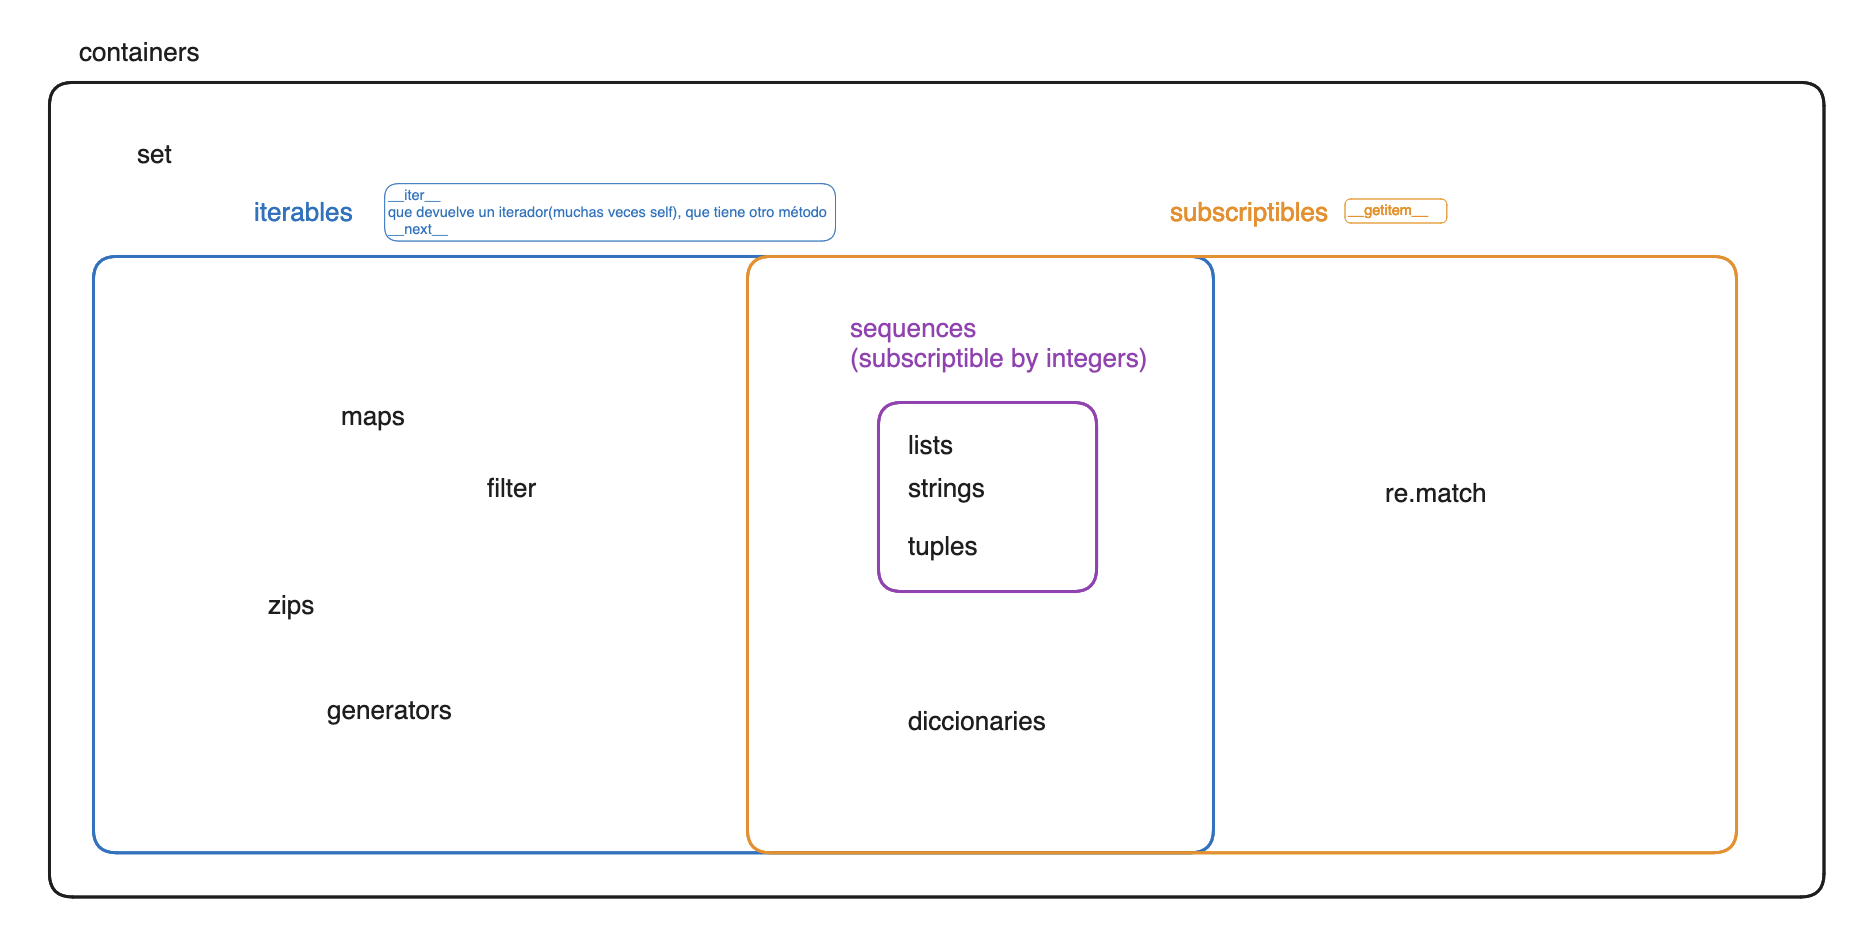